In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer





ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("amazon_reviews.csv")

# Display the first few rows of the DataFrame
print(df.head())

   overall  verified      reviewerID  \
0        5         1  A30VYJQW4XWDQ6   
1        5         1  A30VYJQW4XWDQ6   
2        5         1  A28F08XFZRKIH5   
3        3         1  A157AUOFPJQ46Q   
4        5         1   A2USMIT2CSA08   

                                             product   productID  \
0  AGELESS™: UltraMAX Gold™ Capsules, HGH Anti-Ag...  B0011FYB5I   
1  AGELESS™: UltraMAX Gold™ Capsules, HGH Anti-Ag...  B0011FYB5I   
2  All Natural Deodorant for Women & Men. Organic...  B01DKQAXC0   
3  American Crew Body Wash for Men, Tea Tree Leaf...  B000X7ST9Y   
4  Andalou Naturals, Toner Facial Toner Helps Hyd...  B0091OCA86   

                                          reviewText  
0           Made me look older, it was the opposite.  
1                          Works good with exercise.  
2  great smell, and work better than the bad stuf...  
3  I don't understand the bad reviews because thi...  
4  Smells amazing and does a good job of refreshi...  


In [ ]:
def addlabels(plot,x,y):
    for i in range(len(x)):
        plot.text(i, y[i], y[i], ha = 'center', style='oblique', weight='bold')

/var/folders/qr/vsxkbzcs7sj_g26myvv_5svh0000gn/T/ipykernel_3633/1610448153.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plot.text(i, y[i], y[i], ha = 'center', style='oblique', weight='bold')


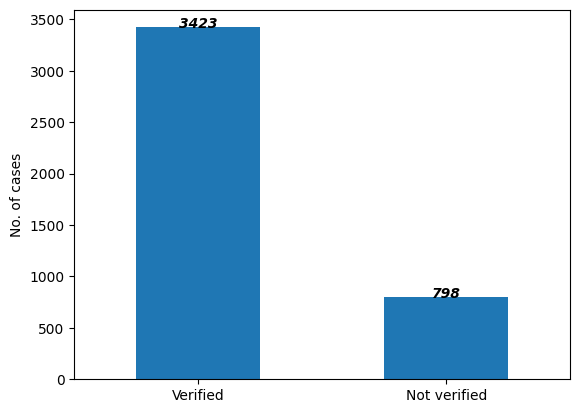

In [ ]:
verified_samples = df.loc[df['verified'] == 'True']
non_verifield_samples = df.loc[df['verified'] == 'False']
value_counts_verified = df['verified'].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
value_counts_verified.plot(kind='bar')

label_list_verified = list(range(0,len(value_counts_verified)))
addlabels(plt,label_list_verified,value_counts_verified)
plt.xticks([0,1],['Verified', 'Not verified'], rotation=0)
plt.ylabel('No. of cases')
plt.xlabel('')


In [ ]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4221 entries, 0 to 4220
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overall     4221 non-null   int64 
 1   verified    4221 non-null   int64 
 2   reviewerID  4221 non-null   object
 3   product     4221 non-null   object
 4   productID   4221 non-null   object
 5   reviewText  4217 non-null   object
dtypes: int64(2), object(4)
memory usage: 198.0+ KB
None


####
 Overall rating distribution:

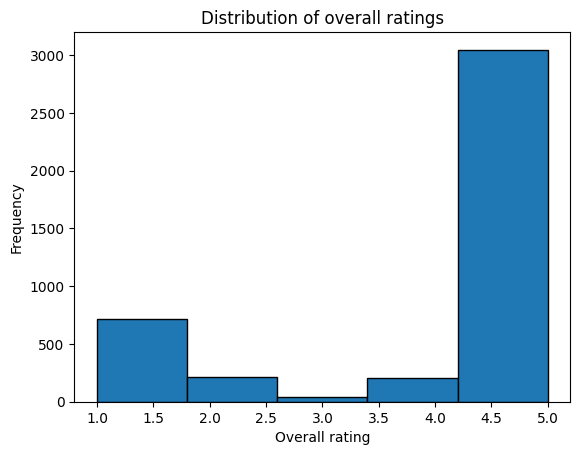

In [ ]:
plt.hist(df['overall'], bins=5, edgecolor='black')
plt.xlabel('Overall rating')
plt.ylabel('Frequency')
plt.title('Distribution of overall ratings')
plt.show()

#### Review counts per product:

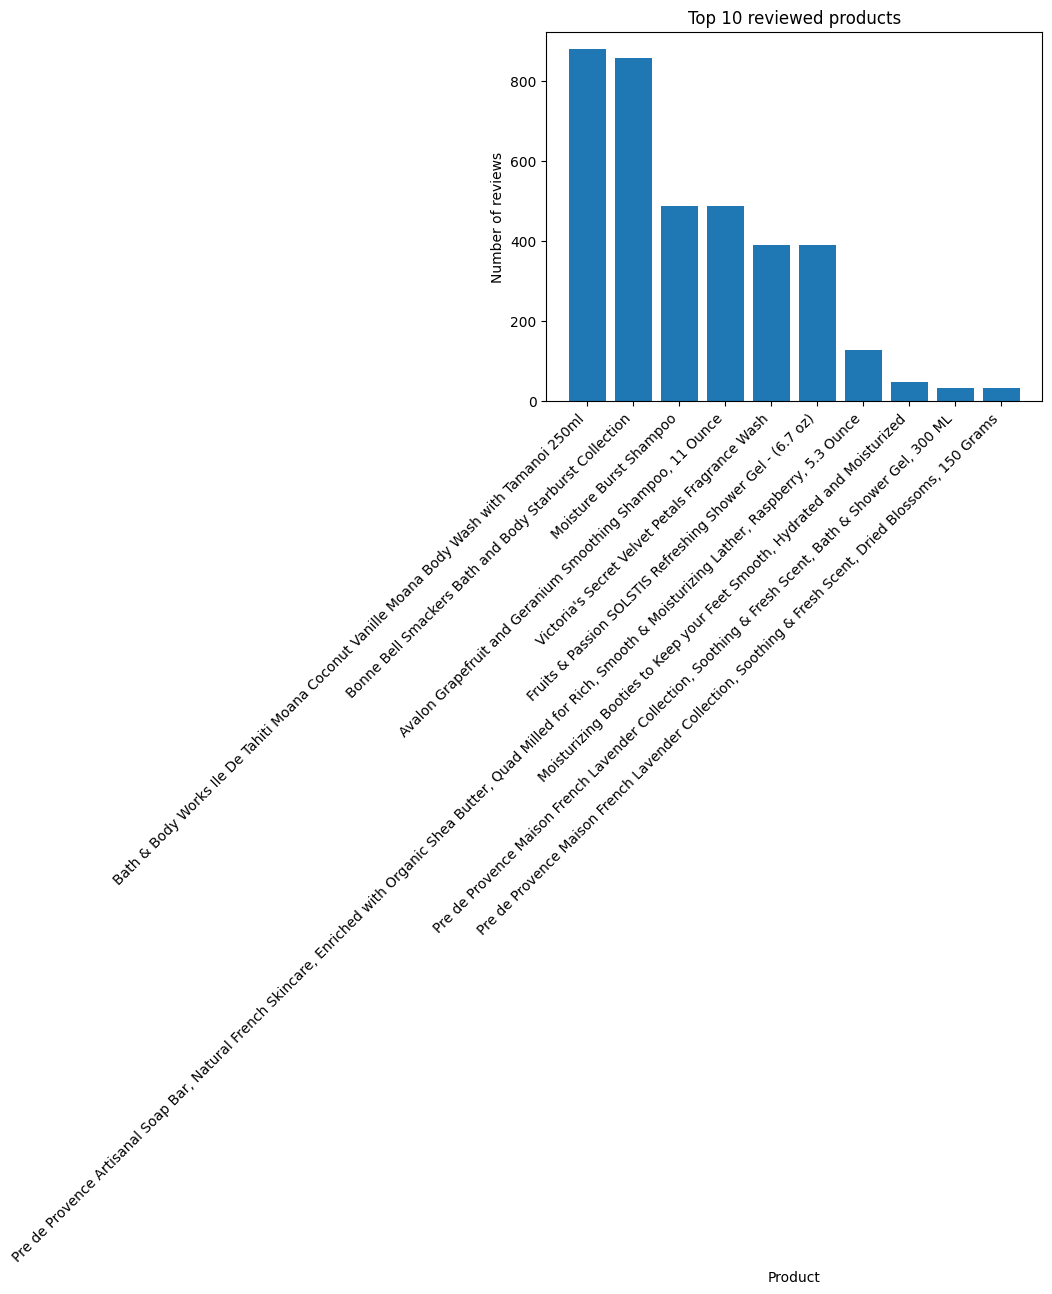

In [ ]:
product_review_counts = df['product'].value_counts().head(10)
plt.bar(product_review_counts.index, product_review_counts.values)
plt.xlabel('Product')
plt.ylabel('Number of reviews')
plt.title('Top 10 reviewed products')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Product gets the most 5 stars:

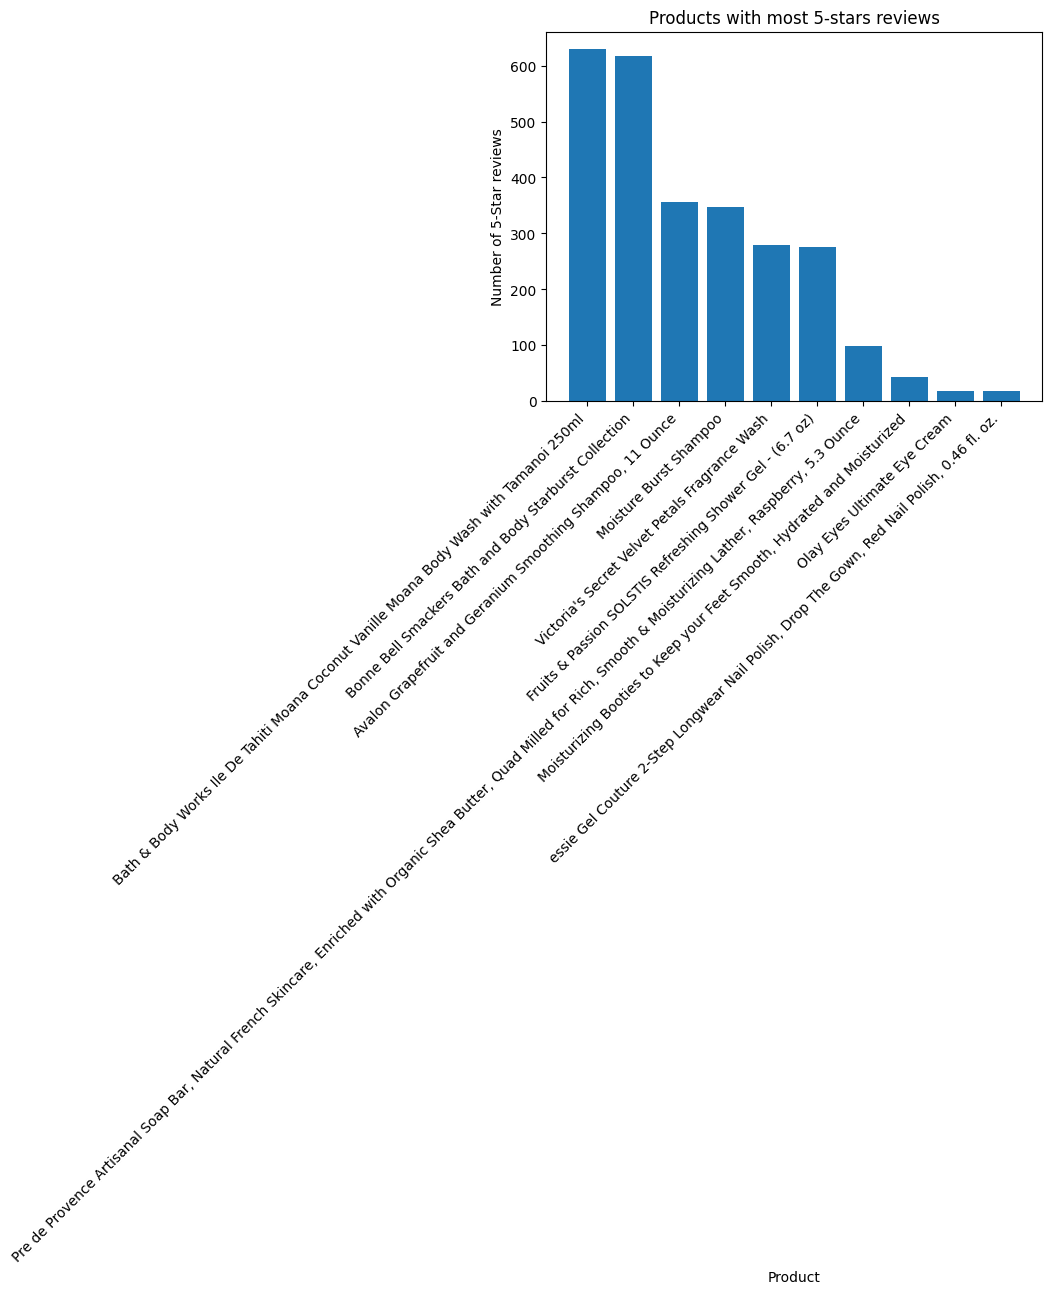

In [ ]:
five_stars = df[df['overall'] == 5]
product_counts_5 = five_stars['product'].value_counts().head(10)
plt.bar(product_counts_5.index, product_counts_5.values)
plt.xlabel('Product')
plt.ylabel('Number of 5-Star reviews')
plt.title('Products with most 5-stars reviews')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Product gets the most 1 star:

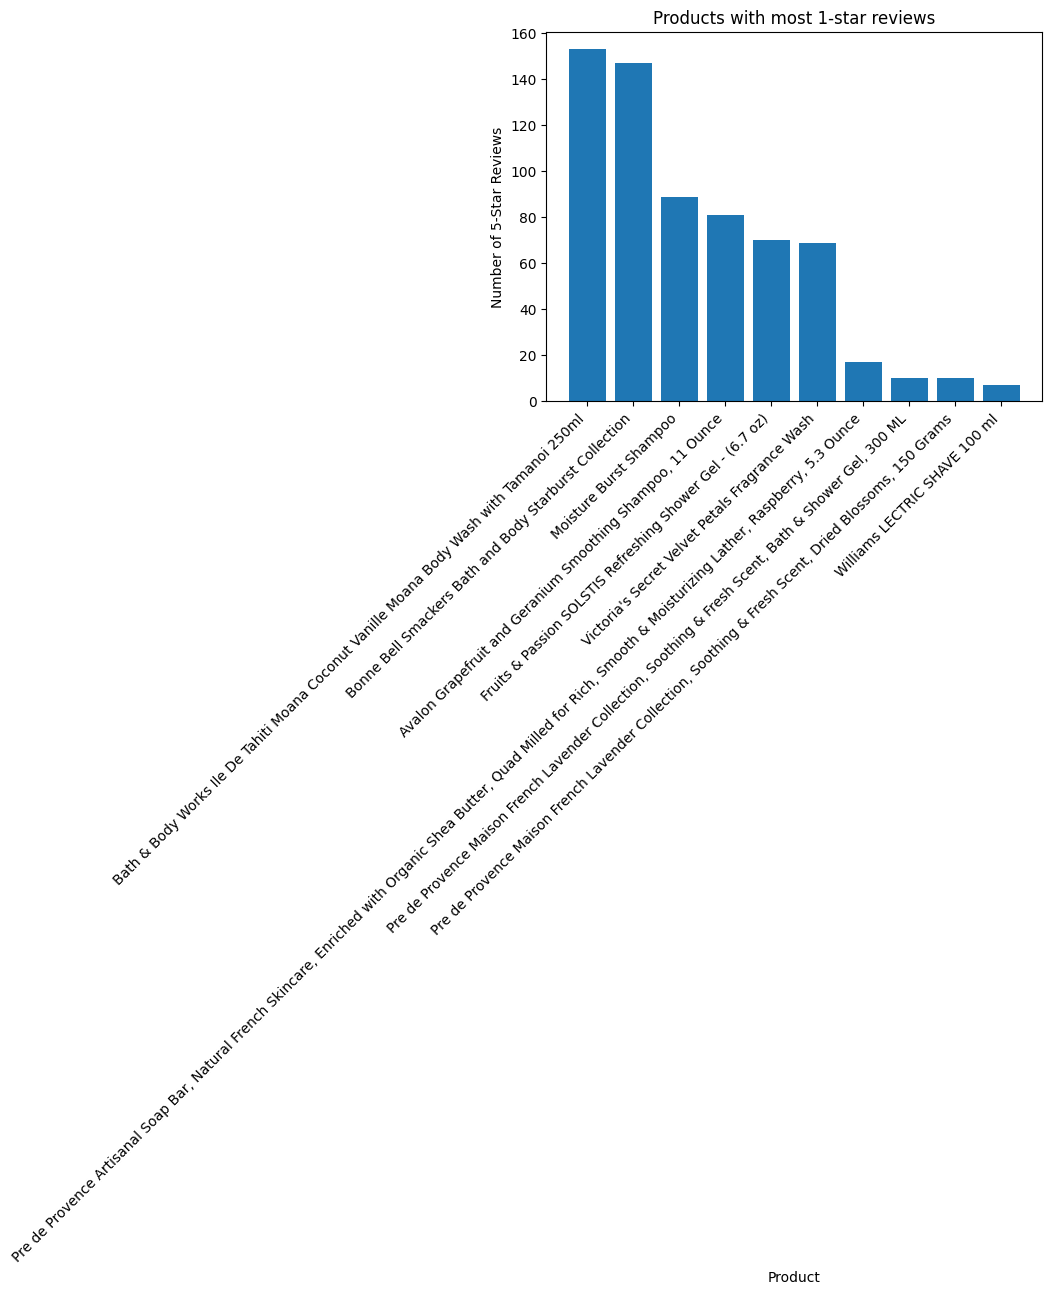

In [ ]:
one_star = df[df['overall'] == 1]
product_counts_1 = one_star['product'].value_counts().head(10)
plt.bar(product_counts_1.index, product_counts_1.values)
plt.xlabel('Product')
plt.ylabel('Number of 5-Star Reviews')
plt.title('Products with most 1-star reviews')
plt.xticks(rotation=45, ha='right')


plt.show()

### Text processing

In [ ]:
df.drop('product', axis=1, inplace=True)
df

,overall,verified,reviewerID,productID,reviewText
0,5,1,A30VYJQW4XWDQ6,B0011FYB5I,"Made me look older, it was the opposite."
1,5,1,A30VYJQW4XWDQ6,B0011FYB5I,Works good with exercise.
2,5,1,A28F08XFZRKIH5,B01DKQAXC0,"great smell, and work better than the bad stuf..."
3,3,1,A157AUOFPJQ46Q,B000X7ST9Y,I don't understand the bad reviews because thi...
4,5,1,A2USMIT2CSA08,B0091OCA86,Smells amazing and does a good job of refreshi...
...,...,...,...,...,...
4216,5,0,A3E5V5TSTAY3R9,B0006O10P4,This is the best smelling soap I've ever found...
4217,5,0,A3E5V5TSTAY3R9,B0006O10P4,This is the best smelling soap I've ever found...
4218,5,0,A281NPSIMI1C2R,B0006O10P4,"Warm, soothing and a little spicy. This zum ba..."
4219,5,1,A3E5V5TSTAY3R9,B0006O10P4,I decided to SPLURGE ($8.98 for a 3 oz. bar) a...


In [ ]:
def remove_bullet_points(text):
    # Define pattern to match bullet points
    bullet_point_pattern = re.compile(r'\s*[\u2022\u2023\u25E6]\s*')  # Matches •, ‣, and ◦ bullet points

    # Remove bullet points from the text
    cleaned_text = bullet_point_pattern.sub(' ', text)

    return cleaned_text

In [ ]:
def remove_emojis_and_symbols_from_text(text):
    # Define pattern to match emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # chinese char
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                           u"\u00ae" # trade Marks ®
                           u"\u00A9" # copy Right ©
                           u"\u2122" # Trade Mark TM
                           u"\u200b"
                           "]+", flags=re.UNICODE)
    # Remove emojis from the text
    cleaned_text = emoji_pattern.sub(r' ', text)
    return cleaned_text

In [ ]:
def decontraction(x):
    contractions = {
        "you've": 'you have',
        "you're": 'you are',
        "haven't": 'have not',
        "hasn't": 'has not',
        "hadn't've": 'had not have',
        "hadn't": 'had not',
        "don't": 'do not',
        "doesn't": 'does not',
        "didn't": 'did not',
        "couldn't've": 'could not have',
        "couldn't": 'could not',
        "could've": 'could have',
        "'cause": 'because',
        "can't've": 'cannot have',
        "aren't": 'are not',
        "ain't": 'am not',
        "can't": 'can not',
        "won't": 'will not',
        "he'd": 'he would',
        "he'd've": 'he would have',
        "he'll": 'he will',
        "he'll've": 'he will have',
        "he's": 'he is',
        "how'd": 'how did',
        "how'd'y": 'how do you',
        "how'll": 'how will',
        "how's": 'how does',
        "i'd": 'i would',
        "i'd've": 'i would have',
        "i'll": 'i will',
        "i'll've": 'i will have',
        "i'm": 'i am',
        "i've": 'i have',
        "isn't": 'is not',
        "it'd": 'it would',
        "it'd've": 'it would have',
        "it'll": 'it will',
        "it'll've": 'it will have',
        "it's": 'it is',
        "let's": 'let us',
        "ma'am": 'madam',
        "mayn't": 'may not',
        "might've": 'might have',
        "mightn't": 'might not',
        "mightn't've": 'might not have',
        "must've": 'must have',
        "mustn't": 'must not',
        "mustn't've": 'must not have',
        "needn't": 'need not',
        "needn't've": 'need not have',
        "o'clock": 'of the clock',
        "oughtn't": 'ought not',
        "oughtn't've": 'ought not have',
        "shan't": 'shall not',
        "sha'n't": 'shall not',
        "shan't've": 'shall not have',
        "she'd": 'she would',
        "she'd've": 'she would have',
        "she'll": 'she will',
        "she'll've": 'she will have',
        "she's": 'she is',
        "should've": 'should have',
        "shouldn't": 'should not',
        "shouldn't've": 'should not have',
        "so've": 'so have',
        "so's": 'so is',
        "that'd": 'that would',
        "that'd've": 'that would have',
        "that's": 'that is',
        "there'd": 'there would',
        "there'd've": 'there would have',
        "there's": 'there is',
        "they'd": 'they would',
        "they'd've": 'they would have',
        "they'll": 'they will',
        "they'll've": 'they will have',
        "they're": 'they are',
        "they've": 'they have',
        "to've": 'to have',
        "wasn't": 'was not',
        "we're": 'we are',
        "'s": " is",
        "n't": ' not',
        "'re": ' are',
        "'d": ' would',
        "'ll": ' will',
        "'t": ' not',
        "'ve": ' have',
        "'m": ' am',
        ' u ': ' you ',
        ' ur ': ' your ',
        ' n ': ' and '
    }

    contractions_comma = {
        "you’ve": 'you have',
        "you’re": 'you are',
        "haven’t": 'have not',
        "hasn’t": 'has not',
        "hadn’t've": 'had not have',
        "hadn’t": 'had not',
        "don’t": 'do not',
        "doesn’t": 'does not',
        "didn’t": 'did not',
        "couldn’t’ve": 'could not have',
        "couldn’t": 'could not',
        "could’ve": 'could have',
        "’cause": 'because',
        "can’t’ve": 'cannot have',
        "aren’t": 'are not',
        "ain’t": 'am not',
        "can’t": 'can not',
        "won’t": 'will not',
        "he’d": 'he would',
        "he'd've": 'he would have',
        "he’ll": 'he will',
        "he’ll’ve": 'he will have',
        "he’s": 'he is',
        "how’d": 'how did',
        "how’d'y": 'how do you',
        "how’ll": 'how will',
        "how’s": 'how does',
        "i’d": 'i would',
        "i’d’ve": 'i would have',
        "i’ll": 'i will',
        "i’ll’ve": 'i will have',
        "i’m": 'i am',
        "i’ve": 'i have',
        "isn’t": 'is not',
        "it’d": 'it would',
        "it’d’ve": 'it would have',
        "it’ll": 'it will',
        "it'll've": 'it will have',
        "it’s": 'it is',
        "let's": 'let us',
        "ma’am": 'madam',
        "mayn’t": 'may not',
        "might’ve": 'might have',
        "mightn’t": 'might not',
        "mightn’t've": 'might not have',
        "must’ve": 'must have',
        "mustn’t": 'must not',
        "mustn’t’ve": 'must not have',
        "needn’t": 'need not',
        "needn’t’ve": 'need not have',
        "o’clock": 'of the clock',
        "oughtn’t": 'ought not',
        "oughtn’t’ve": 'ought not have',
        "shan’t": 'shall not',
        "sha’n’t": 'shall not',
        "shan’t’ve": 'shall not have',
        "she’d": 'she would',
        "she’d’ve": 'she would have',
        "she’ll": 'she will',
        "she’ll’ve": 'she will have',
        "she’s": 'she is',
        "should’ve": 'should have',
        "shouldn’t": 'should not',
        "shouldn't've": 'should not have',
        "so’ve": 'so have',
        "so's": 'so is',
        "that’d": 'that would',
        "that’d've": 'that would have',
        "that’s": 'that is',
        "there’d": 'there would',
        "there’d’ve": 'there would have',
        "there’s": 'there is',
        "they’d": 'they would',
        "they’d've": 'they would have',
        "they’ll": 'they will',
        "they’ll've": 'they will have',
        "they’re": 'they are',
        "they’ve": 'they have',
        "to’ve": 'to have',
        "wasn’t": 'was not',
        "we’re": 'we are',
        "’s": " is",
        "n’t": ' not',
        "’re": ' are',
        "’d": ' would',
        "’ll": ' will',
        "’t": ' not',
        "’ve": ' have',
        "’m": ' am',
        ' u ': ' you ',
        ' ur ': ' your ',
        ' n ': ' and '
    }

    for key in contractions:
        value = contractions[key]
        x = x.replace(key, value)

    for key in contractions_comma:
        value = contractions_comma[key]
        x = x.replace(key, value)
    return x

def removepunc(x):
    punctuation = '!\xad\xa0\xe2\x80\x9d\xe2\x80\x99\xe2\x80\xa2()*+-/:;<=>[]^_`{|}~@#,.?$%&"”“’‘\'…<>«»'
    translation_table = str.maketrans(punctuation, ' ' * len(punctuation))
    return x.translate(translation_table)

def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text)

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, ' ', text)

def remove_ampersand(text):
    text = text.replace('&amp;', '')
    text = text.replace('andamp;', '')
    return text

In [ ]:
def remove_code_from_text(text):
    # Defining the pattern to match the code
    code_pattern = r'\b[0-9a-fA-F]{64}\b'  # Assuming the code is a 64-character hexadecimal string

    # Remove the code from the text
    cleaned_text = re.sub(code_pattern, ' ', text)

    return cleaned_text

In [ ]:
def remove_number_from_text(text):
    # Defining the pattern to match the code
    number_pattern = r'[0-9]'  # Assuming the code is a 64-character hexadecimal string

    # Remove the code from the text
    cleaned_text = re.sub(number_pattern, ' ', text)

    return cleaned_text

In [ ]:
def remove_currency_symbols(text):
    # Define pattern to match currency symbols
    currency_pattern = re.compile(r'[$€¥₹£¢₽₩₪₴₱₨฿₦₮₲₭₵₿]')  # Matches any currency symbol

    # Remove currency symbols from the text
    cleaned_text = currency_pattern.sub(' ', text)

    return cleaned_text

In [ ]:
def remove_hyphens(text):
    # Define pattern to match hyphens within words
    hyphen_pattern = re.compile(r'\b(\w+)[-—‑–](\w+)\b')  # Matches hyphens within words

    # Remove hyphens from the text
    cleaned_text = hyphen_pattern.sub(r'\1 \2', text)

    return cleaned_text

In [ ]:
def text_processing(text):

    # Lowercasing text
    text = text.lower()

    # Removing URLs from text
    text = re.sub(r"http\S+", "", text)

    # Removing newline character
    text = re.sub(r"\n", "", text)

    # Replacing & character with 'and'
    text = re.sub(r"&", "and", text)

    # Removing HTML tags
    text = remove_html_tags(text)

    # Removing ampersand from the text
    text = remove_ampersand(text)

    # Performing decontraction on the text
    text = decontraction(text)

    # Removing the punctuations from the text
    text = removepunc(text)

    # Removing 64-character hexadecimal string in the text
    text = remove_code_from_text(text)

    # Removing number in the text
    text = remove_number_from_text(text)

    # Removing emojis from text
    text = remove_emojis_and_symbols_from_text(text)

    # Remove •, ‣, and ◦ bullet points
    text = remove_bullet_points(text)

    # Remove hyphens from hyphenated word
    text = remove_hyphens(text)

    # Remove currency symbols from the text
    text = remove_currency_symbols(text)

    # Removing extra space in the text
    text = remove_extra_spaces(text)

    return text

In [ ]:
# applying the text processing function to clean the text data
df['clean_reviewText'] = df['reviewText'].map(str).apply(text_processing)
df['clean_reviewText']

0                 made me look older it was the opposite 
1                               works good with exercise 
2       great smell and work better than the bad stuff...
3       i do not understand the bad reviews because th...
4       smells amazing and does a good job of refreshi...
                              ...                        
4216    this is the best smelling soap i have ever fou...
4217    this is the best smelling soap i have ever fou...
4218    warm soothing and a little spicy this zum bar ...
4219    i decided to splurge for a oz bar and buy this...
4220    this is the best smelling soap i have ever fou...
Name: clean_reviewText, Length: 4221, dtype: object

In [ ]:
df['tokenized'] = df['clean_reviewText'].apply(lambda sentence:word_tokenize(sentence))

In [ ]:

# printing the stopwords included in the NLTK library
nltk_stopwords = stopwords.words('english')
print("Total number of Stop words: ",len(nltk_stopwords))
print()
print(nltk_stopwords)

Total number of Stop words:  179

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'onl

In [ ]:
# Function to remove stop words from the text data
def remove_stopwords(tokens):
    # Get the English stop words from NLTK
    stop_words = set(stopwords.words('english'))

    return [word for word in tokens if word.lower() not in stop_words]

# Removing stop words from the tokenized text column
df['stopwords_removed'] = df['tokenized'].apply(remove_stopwords)

df['stopwords_removed']

0                           [made, look, older, opposite]
1                                 [works, good, exercise]
2       [great, smell, work, better, bad, stuff, go, f...
3       [understand, bad, reviews, excellent, body, wa...
4       [smells, amazing, good, job, refreshing, provi...
                              ...                        
4216    [best, smelling, soap, ever, found, potently, ...
4217    [best, smelling, soap, ever, found, potently, ...
4218    [warm, soothing, little, spicy, zum, bar, soap...
4219    [decided, splurge, oz, bar, buy, wonderfully, ...
4220    [best, smelling, soap, ever, found, potently, ...
Name: stopwords_removed, Length: 4221, dtype: object

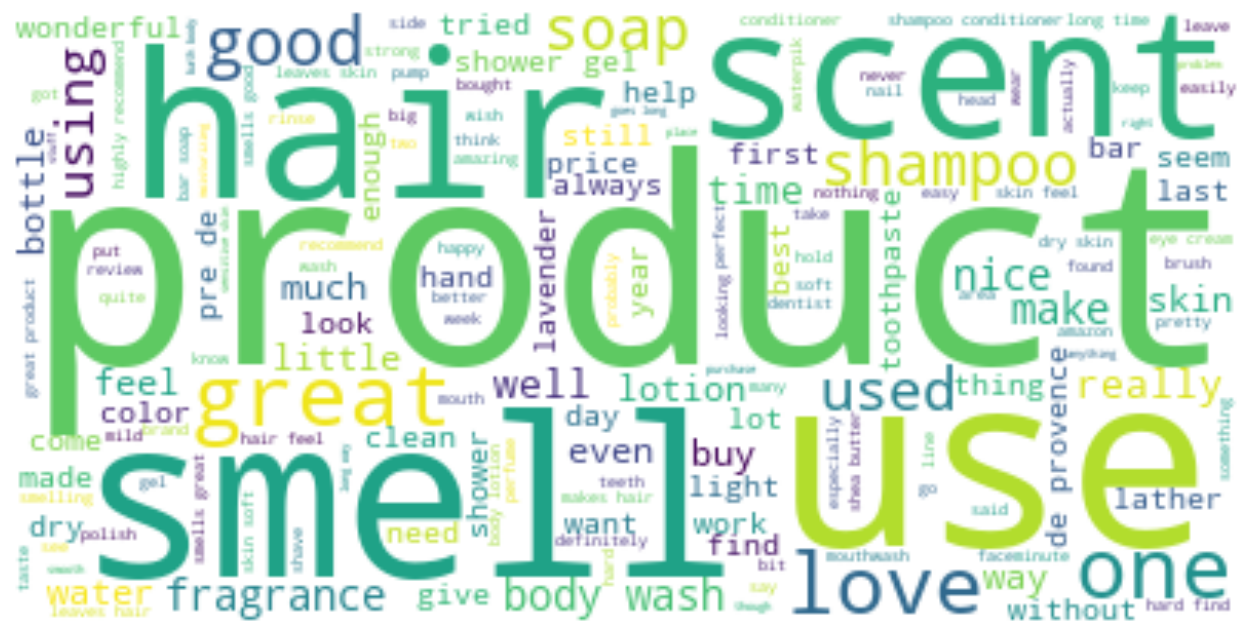

In [ ]:


def join_words_temp(tokens):
    sentence = ' '.join(tokens)
    return sentence

# joining the tokenized words to provide as input to the TfidfVectorizer
df['temp'] = df['stopwords_removed'].apply(join_words_temp)
concatenated_text = ''.join(df['temp'])
df = df.drop(['temp'], axis=1)

wordcloud = WordCloud(background_color="white", max_font_size=100).generate(concatenated_text)

# Plot WordCloud
plt.figure(figsize=(20,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")


In [ ]:
# Stemmatizing
snow_stemmer = nltk.stem.SnowballStemmer('english')

df['stemmatized_text'] = df['stopwords_removed'].apply(lambda x: [snow_stemmer.stem(word) for word in x])
df

,overall,verified,reviewerID,productID,reviewText,clean_reviewText,tokenized,stopwords_removed,stemmatized_text
0,5,1,A30VYJQW4XWDQ6,B0011FYB5I,"Made me look older, it was the opposite.",made me look older it was the opposite,"[made, me, look, older, it, was, the, opposite]","[made, look, older, opposite]","[made, look, older, opposit]"
1,5,1,A30VYJQW4XWDQ6,B0011FYB5I,Works good with exercise.,works good with exercise,"[works, good, with, exercise]","[works, good, exercise]","[work, good, exercis]"
2,5,1,A28F08XFZRKIH5,B01DKQAXC0,"great smell, and work better than the bad stuf...",great smell and work better than the bad stuff...,"[great, smell, and, work, better, than, the, b...","[great, smell, work, better, bad, stuff, go, f...","[great, smell, work, better, bad, stuff, go, f..."
3,3,1,A157AUOFPJQ46Q,B000X7ST9Y,I don't understand the bad reviews because thi...,i do not understand the bad reviews because th...,"[i, do, not, understand, the, bad, reviews, be...","[understand, bad, reviews, excellent, body, wa...","[understand, bad, review, excel, bodi, wash, s..."
4,5,1,A2USMIT2CSA08,B0091OCA86,Smells amazing and does a good job of refreshi...,smells amazing and does a good job of refreshi...,"[smells, amazing, and, does, a, good, job, of,...","[smells, amazing, good, job, refreshing, provi...","[smell, amaz, good, job, refresh, provid, mois..."
...,...,...,...,...,...,...,...,...,...
4216,5,0,A3E5V5TSTAY3R9,B0006O10P4,This is the best smelling soap I've ever found...,this is the best smelling soap i have ever fou...,"[this, is, the, best, smelling, soap, i, have,...","[best, smelling, soap, ever, found, potently, ...","[best, smell, soap, ever, found, potent, scent..."
4217,5,0,A3E5V5TSTAY3R9,B0006O10P4,This is the best smelling soap I've ever found...,this is the best smelling soap i have ever fou...,"[this, is, the, best, smelling, soap, i, have,...","[best, smelling, soap, ever, found, potently, ...","[best, smell, soap, ever, found, potent, scent..."
4218,5,0,A281NPSIMI1C2R,B0006O10P4,"Warm, soothing and a little spicy. This zum ba...",warm soothing and a little spicy this zum bar ...,"[warm, soothing, and, a, little, spicy, this, ...","[warm, soothing, little, spicy, zum, bar, soap...","[warm, sooth, littl, spici, zum, bar, soap, pe..."
4219,5,1,A3E5V5TSTAY3R9,B0006O10P4,I decided to SPLURGE ($8.98 for a 3 oz. bar) a...,i decided to splurge for a oz bar and buy this...,"[i, decided, to, splurge, for, a, oz, bar, and...","[decided, splurge, oz, bar, buy, wonderfully, ...","[decid, splurg, oz, bar, buy, wonder, strong, ..."


In [ ]:

df = df.drop(['reviewText',
              'tokenized', 'clean_reviewText', 'stopwords_removed'], axis=1)

# Rename the column
df = df.rename(columns={'stemmatized_text': 'reviewText'})
df

,overall,verified,reviewerID,productID,reviewText
0,5,1,A30VYJQW4XWDQ6,B0011FYB5I,"[made, look, older, opposit]"
1,5,1,A30VYJQW4XWDQ6,B0011FYB5I,"[work, good, exercis]"
2,5,1,A28F08XFZRKIH5,B01DKQAXC0,"[great, smell, work, better, bad, stuff, go, f..."
3,3,1,A157AUOFPJQ46Q,B000X7ST9Y,"[understand, bad, review, excel, bodi, wash, s..."
4,5,1,A2USMIT2CSA08,B0091OCA86,"[smell, amaz, good, job, refresh, provid, mois..."
...,...,...,...,...,...
4216,5,0,A3E5V5TSTAY3R9,B0006O10P4,"[best, smell, soap, ever, found, potent, scent..."
4217,5,0,A3E5V5TSTAY3R9,B0006O10P4,"[best, smell, soap, ever, found, potent, scent..."
4218,5,0,A281NPSIMI1C2R,B0006O10P4,"[warm, sooth, littl, spici, zum, bar, soap, pe..."
4219,5,1,A3E5V5TSTAY3R9,B0006O10P4,"[decid, splurg, oz, bar, buy, wonder, strong, ..."


In [ ]:
def join_words(tokens):
    sentence = ' '.join(tokens)
    return sentence

# joining the tokenized words to provide as input to the TfidfVectorizer
df['new_reviewText'] = df['reviewText'].apply(join_words)
df['new_reviewText']

0                                 made look older opposit
1                                       work good exercis
2              great smell work better bad stuff go figur
3       understand bad review excel bodi wash smell ni...
4       smell amaz good job refresh provid moistur fre...
                              ...                        
4216    best smell soap ever found potent scent put ba...
4217    best smell soap ever found potent scent put ba...
4218    warm sooth littl spici zum bar soap perfect fa...
4219    decid splurg oz bar buy wonder strong smell so...
4220    best smell soap ever found potent scent put ba...
Name: new_reviewText, Length: 4221, dtype: object

In [ ]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['new_reviewText'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df

,aaa,abat,abil,abl,abras,absenc,absinth,absolut,absorb,abstain,...,yummi,yup,zeal,zent,zero,zest,zingi,zipper,zone,zum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.228919
4217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.226292
4218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.385507
4219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
num_components = 990  # Specify the number of components you want
pc_words = [f"PC{i}" for i in range(1, num_components + 1)]

print(pc_words)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64', 'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82', 'PC83', 'PC84', 'PC85', 'PC86', 'PC87', 'PC88', 'PC89', 'PC90', 'PC91', 'PC92', 'PC93', 'PC94', 'PC95', 'PC96', 'PC97', 'PC98', 'PC99', 'PC100', 'PC101', 'PC102', 'PC103', 'PC104', 'PC105', 'PC106', 'PC107', 'PC108', 'PC109', 'PC110', 'PC111', 'PC112', 'PC113', 'PC114', 'PC115', 'PC116', 'PC117', 'PC118', 'PC119', 'PC120', 'PC121', 'PC122', 'PC123', 

#### The Vectorized Matrix that is created is very sparse matrix and very high Dimensional. So Applying PCA to reduce the dimension to 990.

In [ ]:
#### The Vectorized Matrix that is created is very sparse matrix and very high Dimensional. So Applying PCA to reduce the dimension to 990.
# Convert the TF-IDF matrix to a dense matrix for PCA
dense_tfidf_matrix = tfidf_matrix.toarray()

# Initialize PCA with desired number of components
pca = PCA(n_components=990)

# Apply PCA to the TF-IDF matrix
pca_result = pca.fit_transform(dense_tfidf_matrix)

# Convert PCA result to DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=pc_words)

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC981,PC982,PC983,PC984,PC985,PC986,PC987,PC988,PC989,PC990
0,-0.030391,-0.066808,-0.028680,-0.008844,0.020442,-0.057178,-0.048158,-0.009714,-0.050698,0.002366,...,0.000690,-0.017150,-0.015231,0.002047,0.010751,0.011578,0.002477,-0.004320,-0.000361,-0.000011
1,-0.073535,-0.051843,0.219820,-0.107845,-0.098319,-0.112098,0.005544,-0.060720,-0.074505,-0.027961,...,0.001452,0.000924,-0.000480,-0.000717,-0.001220,-0.000958,0.001432,0.000615,-0.002639,-0.001020
2,-0.097053,0.133551,-0.037547,-0.042236,-0.197429,-0.070346,-0.057150,-0.029775,0.014848,-0.020315,...,-0.020167,0.014240,0.026683,0.007154,-0.006826,0.000909,0.021170,-0.004203,-0.025076,0.013759
3,-0.044693,-0.113632,-0.095022,-0.076171,0.093969,0.218642,0.074336,0.147885,0.121875,-0.133767,...,-0.001023,-0.004158,0.004520,0.006673,-0.025445,-0.014778,0.005755,-0.022951,0.021592,-0.005451
4,-0.049544,-0.073450,0.136081,-0.135660,-0.124650,0.126126,-0.025988,-0.002175,0.036978,-0.069041,...,-0.018882,0.000004,-0.011599,-0.008083,0.027564,-0.004713,0.004694,0.004660,-0.019016,-0.025023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4216,-0.033322,-0.081877,-0.074644,-0.076394,-0.084853,0.084122,-0.077198,0.017979,0.035885,-0.093471,...,-0.006762,0.002055,0.011640,-0.002806,-0.005339,-0.009573,0.002275,0.001226,-0.002994,0.004530
4217,-0.036226,-0.078744,-0.074215,-0.080633,-0.077985,0.077965,-0.083690,0.024707,0.036211,-0.095665,...,-0.006546,0.003185,0.008722,-0.001870,-0.005848,-0.006138,0.004869,0.000282,-0.004151,0.006280
4218,0.000837,-0.046980,-0.088055,-0.049398,-0.040374,-0.000471,-0.017243,-0.018140,-0.092199,-0.126234,...,0.047905,-0.026509,-0.058837,-0.039231,0.025827,0.032496,-0.053966,-0.007463,0.014151,-0.003838
4219,-0.031084,-0.064400,-0.064344,-0.072426,-0.092444,0.073647,-0.087801,0.051342,0.091041,0.006709,...,-0.025369,0.030718,0.008040,-0.019698,0.017479,0.008205,-0.013022,-0.034210,-0.011159,-0.026817


In [ ]:
# Remove indexing
pca_df = pca_df.reset_index(drop=True)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC981,PC982,PC983,PC984,PC985,PC986,PC987,PC988,PC989,PC990
0,-0.030391,-0.066808,-0.028680,-0.008844,0.020442,-0.057178,-0.048158,-0.009714,-0.050698,0.002366,...,0.000690,-0.017150,-0.015231,0.002047,0.010751,0.011578,0.002477,-0.004320,-0.000361,-0.000011
1,-0.073535,-0.051843,0.219820,-0.107845,-0.098319,-0.112098,0.005544,-0.060720,-0.074505,-0.027961,...,0.001452,0.000924,-0.000480,-0.000717,-0.001220,-0.000958,0.001432,0.000615,-0.002639,-0.001020
2,-0.097053,0.133551,-0.037547,-0.042236,-0.197429,-0.070346,-0.057150,-0.029775,0.014848,-0.020315,...,-0.020167,0.014240,0.026683,0.007154,-0.006826,0.000909,0.021170,-0.004203,-0.025076,0.013759
3,-0.044693,-0.113632,-0.095022,-0.076171,0.093969,0.218642,0.074336,0.147885,0.121875,-0.133767,...,-0.001023,-0.004158,0.004520,0.006673,-0.025445,-0.014778,0.005755,-0.022951,0.021592,-0.005451
4,-0.049544,-0.073450,0.136081,-0.135660,-0.124650,0.126126,-0.025988,-0.002175,0.036978,-0.069041,...,-0.018882,0.000004,-0.011599,-0.008083,0.027564,-0.004713,0.004694,0.004660,-0.019016,-0.025023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4216,-0.033322,-0.081877,-0.074644,-0.076394,-0.084853,0.084122,-0.077198,0.017979,0.035885,-0.093471,...,-0.006762,0.002055,0.011640,-0.002806,-0.005339,-0.009573,0.002275,0.001226,-0.002994,0.004530
4217,-0.036226,-0.078744,-0.074215,-0.080633,-0.077985,0.077965,-0.083690,0.024707,0.036211,-0.095665,...,-0.006546,0.003185,0.008722,-0.001870,-0.005848,-0.006138,0.004869,0.000282,-0.004151,0.006280
4218,0.000837,-0.046980,-0.088055,-0.049398,-0.040374,-0.000471,-0.017243,-0.018140,-0.092199,-0.126234,...,0.047905,-0.026509,-0.058837,-0.039231,0.025827,0.032496,-0.053966,-0.007463,0.014151,-0.003838
4219,-0.031084,-0.064400,-0.064344,-0.072426,-0.092444,0.073647,-0.087801,0.051342,0.091041,0.006709,...,-0.025369,0.030718,0.008040,-0.019698,0.017479,0.008205,-0.013022,-0.034210,-0.011159,-0.026817


In [ ]:
df = df.drop(['reviewText', 'new_reviewText'], axis=1)

In [ ]:
# Remove indexing
df = df.reset_index(drop=True)
df

,overall,verified,reviewerID,productID
0,5,1,A30VYJQW4XWDQ6,B0011FYB5I
1,5,1,A30VYJQW4XWDQ6,B0011FYB5I
2,5,1,A28F08XFZRKIH5,B01DKQAXC0
3,3,1,A157AUOFPJQ46Q,B000X7ST9Y
4,5,1,A2USMIT2CSA08,B0091OCA86
...,...,...,...,...
4216,5,0,A3E5V5TSTAY3R9,B0006O10P4
4217,5,0,A3E5V5TSTAY3R9,B0006O10P4
4218,5,0,A281NPSIMI1C2R,B0006O10P4
4219,5,1,A3E5V5TSTAY3R9,B0006O10P4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4221 entries, 0 to 4220
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overall     4221 non-null   int64 
 1   verified    4221 non-null   int64 
 2   reviewerID  4221 non-null   object
 3   productID   4221 non-null   object
dtypes: int64(2), object(2)
memory usage: 132.0+ KB


In [ ]:


label_encoder = LabelEncoder()
df['reviewerID_encoded'] = label_encoder.fit_transform(df['reviewerID'])
df['productID_encoded'] = label_encoder.fit_transform(df['productID'])
df.drop(['reviewerID', 'productID'], axis=1, inplace=True)
df


,overall,verified,reviewerID_encoded,productID_encoded
0,5,1,533,25
1,5,1,533,25
2,5,1,320,82
3,3,1,36,21
4,5,1,494,51
...,...,...,...,...
4216,5,0,623,4
4217,5,0,623,4
4218,5,0,317,4
4219,5,1,623,4


#### Concatenating the Label encoded dataframe and Features dataframe generated through PCA.
#### Finally, 999 dimensional input feature map is ready

In [ ]:
# Concatenate PCA result DataFrame with the original DataFrame
df_concatenated = pd.concat([df, pca_df], axis=1)

# Print the concatenated DataFrame
df_concatenated

,overall,verified,reviewerID_encoded,productID_encoded,PC1,PC2,PC3,PC4,PC5,PC6,...,PC981,PC982,PC983,PC984,PC985,PC986,PC987,PC988,PC989,PC990
0,5,1,533,25,-0.030391,-0.066808,-0.028680,-0.008844,0.020442,-0.057178,...,0.000690,-0.017150,-0.015231,0.002047,0.010751,0.011578,0.002477,-0.004320,-0.000361,-0.000011
1,5,1,533,25,-0.073535,-0.051843,0.219820,-0.107845,-0.098319,-0.112098,...,0.001452,0.000924,-0.000480,-0.000717,-0.001220,-0.000958,0.001432,0.000615,-0.002639,-0.001020
2,5,1,320,82,-0.097053,0.133551,-0.037547,-0.042236,-0.197429,-0.070346,...,-0.020167,0.014240,0.026683,0.007154,-0.006826,0.000909,0.021170,-0.004203,-0.025076,0.013759
3,3,1,36,21,-0.044693,-0.113632,-0.095022,-0.076171,0.093969,0.218642,...,-0.001023,-0.004158,0.004520,0.006673,-0.025445,-0.014778,0.005755,-0.022951,0.021592,-0.005451
4,5,1,494,51,-0.049544,-0.073450,0.136081,-0.135660,-0.124650,0.126126,...,-0.018882,0.000004,-0.011599,-0.008083,0.027564,-0.004713,0.004694,0.004660,-0.019016,-0.025023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4216,5,0,623,4,-0.033322,-0.081877,-0.074644,-0.076394,-0.084853,0.084122,...,-0.006762,0.002055,0.011640,-0.002806,-0.005339,-0.009573,0.002275,0.001226,-0.002994,0.004530
4217,5,0,623,4,-0.036226,-0.078744,-0.074215,-0.080633,-0.077985,0.077965,...,-0.006546,0.003185,0.008722,-0.001870,-0.005848,-0.006138,0.004869,0.000282,-0.004151,0.006280
4218,5,0,317,4,0.000837,-0.046980,-0.088055,-0.049398,-0.040374,-0.000471,...,0.047905,-0.026509,-0.058837,-0.039231,0.025827,0.032496,-0.053966,-0.007463,0.014151,-0.003838
4219,5,1,623,4,-0.031084,-0.064400,-0.064344,-0.072426,-0.092444,0.073647,...,-0.025369,0.030718,0.008040,-0.019698,0.017479,0.008205,-0.013022,-0.034210,-0.011159,-0.026817


In [ ]:
print(df.shape)

print(df_concatenated.shape)

(4221, 4)
(4221, 994)


In [ ]:
df_concatenated.to_csv("amazon_reviews_encoded.csv", index=False)

In [ ]:

df = df_concatenated

df

,overall,verified,reviewerID_encoded,productID_encoded,PC1,PC2,PC3,PC4,PC5,PC6,...,PC981,PC982,PC983,PC984,PC985,PC986,PC987,PC988,PC989,PC990
0,5,1,533,25,-0.030391,-0.066808,-0.028680,-0.008844,0.020442,-0.057178,...,0.000690,-0.017150,-0.015231,0.002047,0.010751,0.011578,0.002477,-0.004320,-0.000361,-0.000011
1,5,1,533,25,-0.073535,-0.051843,0.219820,-0.107845,-0.098319,-0.112098,...,0.001452,0.000924,-0.000480,-0.000717,-0.001220,-0.000958,0.001432,0.000615,-0.002639,-0.001020
2,5,1,320,82,-0.097053,0.133551,-0.037547,-0.042236,-0.197429,-0.070346,...,-0.020167,0.014240,0.026683,0.007154,-0.006826,0.000909,0.021170,-0.004203,-0.025076,0.013759
3,3,1,36,21,-0.044693,-0.113632,-0.095022,-0.076171,0.093969,0.218642,...,-0.001023,-0.004158,0.004520,0.006673,-0.025445,-0.014778,0.005755,-0.022951,0.021592,-0.005451
4,5,1,494,51,-0.049544,-0.073450,0.136081,-0.135660,-0.124650,0.126126,...,-0.018882,0.000004,-0.011599,-0.008083,0.027564,-0.004713,0.004694,0.004660,-0.019016,-0.025023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4216,5,0,623,4,-0.033322,-0.081877,-0.074644,-0.076394,-0.084853,0.084122,...,-0.006762,0.002055,0.011640,-0.002806,-0.005339,-0.009573,0.002275,0.001226,-0.002994,0.004530
4217,5,0,623,4,-0.036226,-0.078744,-0.074215,-0.080633,-0.077985,0.077965,...,-0.006546,0.003185,0.008722,-0.001870,-0.005848,-0.006138,0.004869,0.000282,-0.004151,0.006280
4218,5,0,317,4,0.000837,-0.046980,-0.088055,-0.049398,-0.040374,-0.000471,...,0.047905,-0.026509,-0.058837,-0.039231,0.025827,0.032496,-0.053966,-0.007463,0.014151,-0.003838
4219,5,1,623,4,-0.031084,-0.064400,-0.064344,-0.072426,-0.092444,0.073647,...,-0.025369,0.030718,0.008040,-0.019698,0.017479,0.008205,-0.013022,-0.034210,-0.011159,-0.026817


In [ ]:
print(df.shape)

(4221, 994)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('verified', axis=1), df['verified'], test_size=0.2, random_state=42)

# Shuffle the rows
df = df.sample(frac=1).reset_index(drop=True)

# Split the DataFrame into training and testing sets
temp_train_df, temp_test_df = train_test_split(df, test_size=0.3, random_state=42)


In [ ]:
train_df, val_df = train_test_split(temp_train_df, test_size=0.5, random_state=42)

In [ ]:
train_df_targets = train_df['verified']
val_df_targets = val_df['verified']
test_df_targets = temp_test_df['verified']

train_df = train_df.drop(columns=['verified'])
val_df = val_df.drop(columns=['verified'])
test_df = temp_test_df.drop(columns=['verified'])

In [ ]:
cols_list = ['overall', 'reviewerID_encoded', 'productID_encoded',]

In [ ]:
class Standardizer:
    def __init__(self, mean, stdev):
        self.mean = mean
        self.stdev = stdev
    def scale(self, x):
        return (x - self.mean)/self.stdev

In [ ]:
# Define the 'cols_list' variable
cols_list = ['overall', 'reviewerID_encoded', 'productID_encoded',]

# Apply Standardizer to train_df, val_df, and test_df
for feature in cols_list:
    train_df[feature] = train_df[feature].apply(Standardizer(train_df[feature].mean(), train_df[feature].std()).scale)

for feature in cols_list:
    val_df[feature] = val_df[feature].apply(Standardizer(val_df[feature].mean(), val_df[feature].std()).scale)

for feature in cols_list:
    test_df[feature] = test_df[feature].apply(Standardizer(test_df[feature].mean(), test_df[feature].std()).scale)

### DEEP LEARNING ALGORITHMS


In [ ]:
# Convert data to TensorFlow tensors
train_inputs_tensor = tf.convert_to_tensor(train_df, dtype=tf.float32)
train_targets_tensor = tf.convert_to_tensor(train_df_targets, dtype=tf.int32)

val_inputs_tensor = tf.convert_to_tensor(val_df, dtype=tf.float32)
val_targets_tensor = tf.convert_to_tensor(val_df_targets, dtype=tf.int32)

test_inputs_tensor = tf.convert_to_tensor(test_df, dtype=tf.float32)
test_targets_tensor = tf.convert_to_tensor(test_df_targets, dtype=tf.int32)


### ARTIFICIAL NEURAL NETWORK



In [ ]:
input_size = 993

output_classes = 2

In [ ]:
# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(input_size,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(output_classes, activation='softmax')
])


# Print the model summary
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       508,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 578,786 (2.21 MB)

 Trainable params: 578,786 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model with validation accuracy and early stopping
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

# Define model checkpoint callback to save the best model
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model_ann.keras',
                                                      monitor='val_accuracy',
                                                      save_best_only=True,
                                                      mode='max',
                                                      verbose=1)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(train_inputs_tensor, train_targets_tensor,
                    epochs=30,
                    validation_data=(val_inputs_tensor, val_targets_tensor),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/30


33/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8164 - loss: 0.5264 
Epoch 1: val_accuracy improved from -inf to 0.83412, saving model to best_model_ann.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8200 - loss: 0.5046 - val_accuracy: 0.8341 - val_loss: 0.4111
Epoch 2/30
36/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8740 - loss: 0.2746
Epoch 2: val_accuracy improved from 0.83412 to 0.87813, saving model to best_model_ann.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8791 - loss: 0.2681 - val_accuracy: 0.8781 - val_loss: 0.3057
Epoch 3/30
32/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9768 - loss: 0.1044
Epoch 3: val_accuracy improved from 0.87813 to 0.91198, saving model to best_model_ann.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9775 - loss: 0.1013 - val_accuracy: 0.9120 - val_loss: 0.2576
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9927 - loss: 0.0454
Epoch 4: val_accuracy improved from 0.91198 to 0.9146

In [ ]:
# Load the saved model
model = load_model("best_model_ann.keras")

In [ ]:
# Assuming X_test contains the test data
# Make predictions on the test data
predictions = model.predict(test_inputs_tensor)

# predictions contain the probability distribution over classes for each sample
#
predicted_labels = tf.argmax(predictions, axis=1)

# Print the predicted labels
print(predicted_labels)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
tf.Tensor([0 1 1 ... 0 0 1], shape=(1267,), dtype=int64)


In [ ]:
# Calculate accuracy
accuracy_mlp = accuracy_score(test_targets_tensor, predicted_labels)
print("Accuracy:", accuracy_mlp)

# Calculate F1 score
f1_mlp = f1_score(test_targets_tensor, predicted_labels)
print("F1 Score:", f1_mlp)

# Print classification report
print("Classification Report:")
print(classification_report(test_targets_tensor, predicted_labels))

Accuracy: 0.9179163378058406
F1 Score: 0.9505703422053232
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.76       239
           1       0.93      0.97      0.95      1028

    accuracy                           0.92      1267
   macro avg       0.89      0.83      0.85      1267
weighted avg       0.92      0.92      0.91      1267



### MACHINE LEARNING MODELS

In [ ]:
### Machine learning
train_df_targets = temp_train_df['verified']
test_df_targets = temp_test_df['verified']

train_df = temp_train_df.drop(columns=['verified'])
test_df = temp_test_df.drop(columns=['verified'])


In [ ]:
for feature in cols_list:
    train_df[feature] = train_df[feature].apply(Standardizer(train_df[feature].mean(), train_df[feature].std()).scale)

for feature in cols_list:
    test_df[feature] = test_df[feature].apply(Standardizer(test_df[feature].mean(), test_df[feature].std()).scale)

In [ ]:
train_df

,overall,reviewerID_encoded,productID_encoded,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,PC981,PC982,PC983,PC984,PC985,PC986,PC987,PC988,PC989,PC990
2211,-1.358548,-0.982273,0.251458,-0.083123,-0.045337,0.199616,0.060667,0.040813,0.072435,0.023965,...,-0.001000,-0.002380,0.000220,-0.001315,0.002434,-0.000529,-0.000430,0.001954,-0.002100,0.002223
3825,0.566532,-1.728606,-1.083068,-0.036416,-0.065054,-0.043826,-0.043843,0.020725,-0.079765,-0.072813,...,0.000029,0.000159,-0.001077,0.000069,-0.000395,0.000698,0.000566,0.001040,-0.000864,-0.000146
3045,-2.000241,-0.106900,-0.511128,-0.067036,-0.078438,-0.003447,0.114410,-0.016809,-0.046968,-0.023118,...,0.015197,-0.001134,0.000039,0.000330,0.001282,-0.003999,-0.005632,-0.000263,0.004949,0.002190
1822,0.566532,0.475519,0.251458,0.104995,-0.054659,-0.030990,0.129294,0.014658,-0.004659,0.230770,...,-0.003183,0.003066,-0.003374,0.000090,0.002244,-0.003519,0.003844,0.004038,0.002728,0.004577
2292,-1.358548,1.493881,2.586879,0.022432,-0.041599,-0.048336,-0.054917,0.037204,0.030360,0.077283,...,0.010170,-0.008555,-0.005245,0.003233,-0.003445,-0.004703,0.013607,-0.002191,0.003085,-0.010278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0.566532,1.507831,0.251458,-0.061813,-0.049821,-0.011952,-0.013832,0.068850,0.023225,-0.019307,...,0.002604,-0.000164,-0.001070,-0.003177,-0.004976,0.010159,0.006476,-0.000010,0.006280,0.005611
466,0.566532,-1.163625,-0.892422,-0.028349,-0.073123,-0.032331,-0.030667,0.040292,-0.083226,-0.049482,...,-0.002383,-0.001303,0.003898,0.000265,0.001273,0.001035,-0.004515,0.001585,0.000771,-0.002750
3092,0.566532,0.234879,-0.844760,-0.047096,-0.130953,-0.081960,0.016572,0.012305,0.120034,0.102295,...,-0.004103,0.002012,-0.001786,-0.005848,0.005592,0.002525,-0.001054,0.000251,0.001429,-0.000068
3772,0.566532,0.660359,-0.511128,0.205948,-0.015884,-0.071147,-0.072166,0.040299,-0.113787,0.015739,...,0.002948,-0.006852,0.002962,-0.006644,0.013914,0.005948,-0.002440,0.002067,-0.000304,-0.003709


In [ ]:
X_train = train_df.values
y_train = train_df_targets.values

X_test = test_df.values
y_test = test_df_targets.values

### LOGISTIC REGRESSION

In [ ]:

# Initialize the logistic regression model
logistic_reg = LogisticRegression(max_iter=1000)

# Train the model on the training data
logistic_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lr = logistic_reg.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)

# Calculate F1 score
f1_lr = f1_score(y_test, y_pred_lr)
print("F1 Score:", f1_lr)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.8800315706393055
F1 Score: 0.9302112029384757
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.43      0.57       239
           1       0.88      0.99      0.93      1028

    accuracy                           0.88      1267
   macro avg       0.88      0.71      0.75      1267
weighted avg       0.88      0.88      0.86      1267



In [ ]:
# Initialize the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_knn = knn.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

# Calculate F1 score
f1_knn = f1_score(y_test, y_pred_knn)
print("F1 Score:", f1_knn)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.8729281767955801
F1 Score: 0.9240924092409241
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.53      0.61       239
           1       0.90      0.95      0.92      1028

    accuracy                           0.87      1267
   macro avg       0.81      0.74      0.77      1267
weighted avg       0.86      0.87      0.86      1267



In [ ]:
accuracy_score_entropy = []
f1_score_entropy = []

num_trees = [50, 100, 150, 200, 250]
for n in num_trees:
    random_forest = RandomForestClassifier(n_estimators=n, criterion='entropy', random_state=42)
    random_forest.fit(X_train, y_train)
    y_pred_rf = random_forest.predict(X_test)
    accuracy_score_entropy.append(accuracy_score(y_test,y_pred_rf))
    f1_score_entropy.append(f1_score(y_test,y_pred_rf))

    print(f"\nAccuracy for {n} estimators: {accuracy_score_entropy[-1]}")
    print(f"F1 score for {n} estimators: {f1_score_entropy[-1]}")


Accuracy for 50 estimators: 0.9723756906077348
F1 score for 50 estimators: 0.9829184968277208

Accuracy for 100 estimators: 0.9747434885556433
F1 score for 100 estimators: 0.9844054580896686

Accuracy for 150 estimators: 0.9715864246250987
F1 score for 150 estimators: 0.9824561403508771

Accuracy for 200 estimators: 0.9723756906077348
F1 score for 200 estimators: 0.9829351535836177

Accuracy for 250 estimators: 0.9731649565903709
F1 score for 250 estimators: 0.9833822091886608


In [ ]:
# Initialize Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=150, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)

# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

# Calculate F1 score
f1_rf = f1_score(y_test, y_pred_rf)
print("F1 Score:", f1_rf)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9755327545382794
F1 Score: 0.9847815414825725
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       239
           1       0.99      0.98      0.98      1028

    accuracy                           0.98      1267
   macro avg       0.95      0.98      0.96      1267
weighted avg       0.98      0.98      0.98      1267



### PLOTTING PERFORMANCE


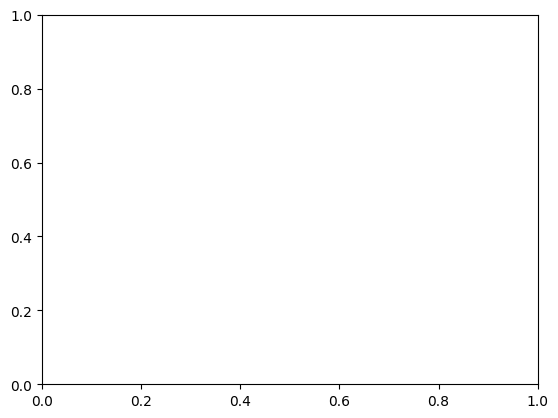

In [ ]:


# Define the variable "ax"
ax = plt.gca()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

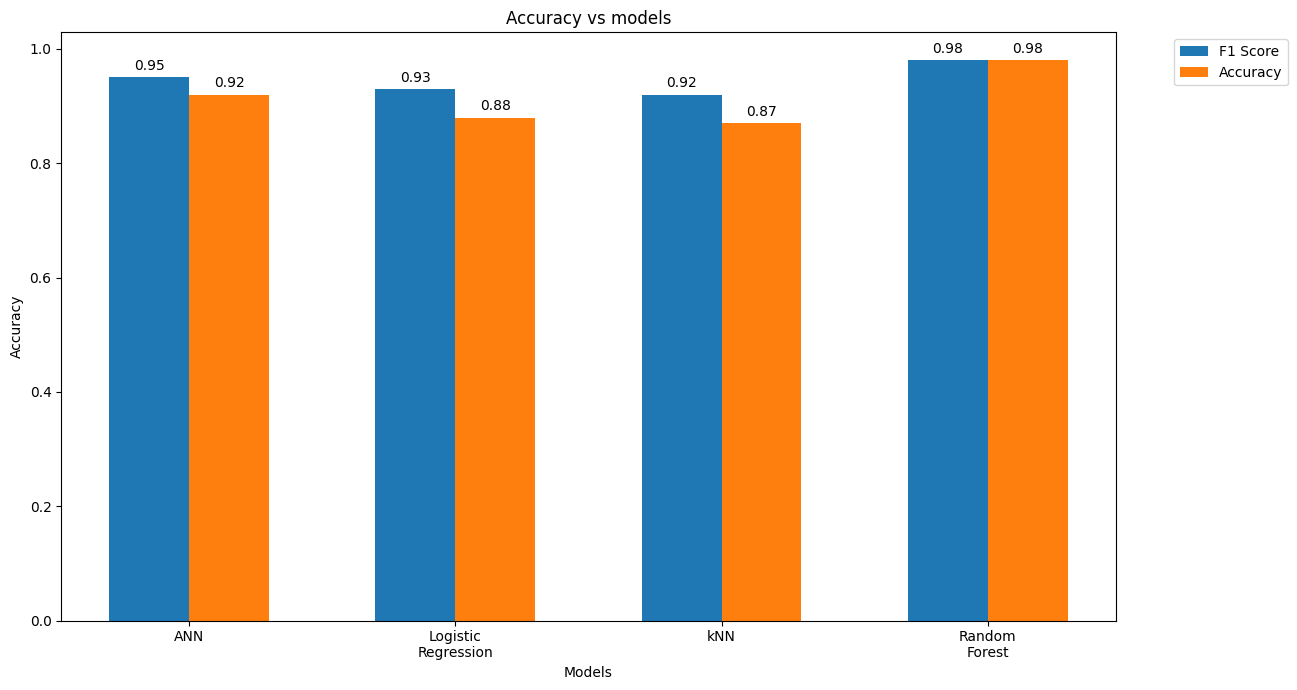

In [ ]:
labels = ['ANN',  'Logistic\nRegression', 'kNN',  'Random\nForest']
f1_score = [f1_mlp, f1_lr, f1_knn, f1_rf]
testing_accuracy = [accuracy_mlp,  accuracy_lr, accuracy_knn, accuracy_rf]

f1_score = [round(elem, 2) for elem in f1_score ]
testing_accuracy = [round(elem, 2) for elem in testing_accuracy ]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(13, 7))
rects1 = ax.bar(x - width/2, f1_score, width, label='F1 Score')
rects2 = ax.bar(x + width/2, testing_accuracy, width, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Models')
ax.set_title('Accuracy vs models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper right', bbox_to_anchor=(1.17, 1))


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()


f1_score = np.resize(f1_score, (2,))
testing_accuracy = np.resize(testing_accuracy, (2,))


### PLOTTING HEATMAP


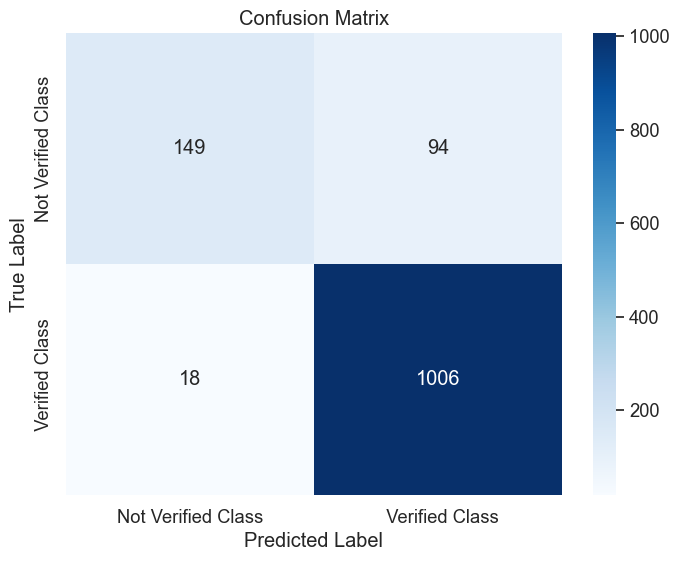

In [ ]:

# Calculate confusion matrix
cm = confusion_matrix(test_targets_tensor, predicted_labels)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Not Verified Class', '  Verified Class'],
            yticklabels=['Not Verified Class', '  Verified Class'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.show()